
First few rows of the dataset:
                       Trigram  Count
0     logrhythm siem logrhythm   1442
1        go homepage logrhythm   1084
2      homepage logrhythm siem   1084
3     siem logrhythm community   1084
4  logrhythm community support   1084



Last few rows of the dataset:
                             Trigram  Count
50344     system network compromise.      5
50345      network compromise. types      5
50346         compromise. types logs      5
50347  reporting warnings. copyright      5
50348          warnings. copyright ©      5


Description of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50349 entries, 0 to 50348
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Trigram  50349 non-null  object
 1   Count    50349 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 786.8+ KB
None


Descriptive Statistics:
              Count
count  50349.000000
mean      10.981906
std       30.2

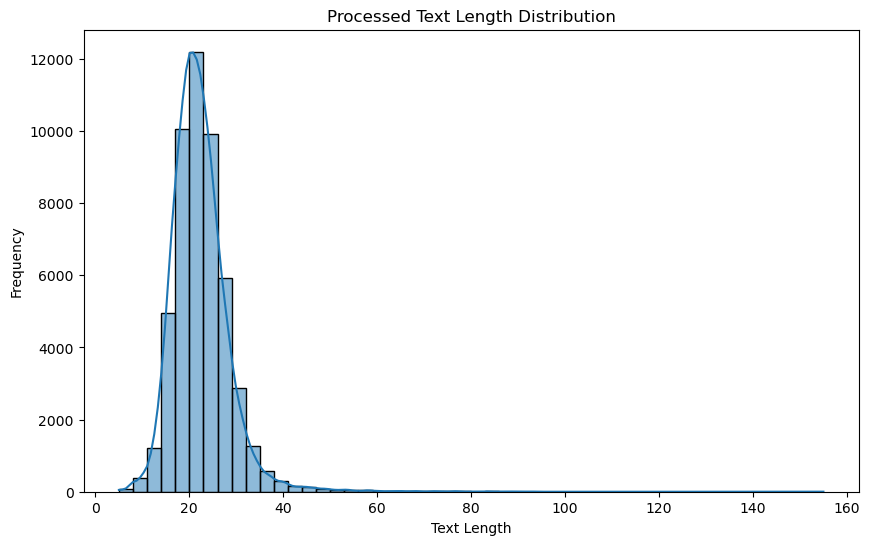

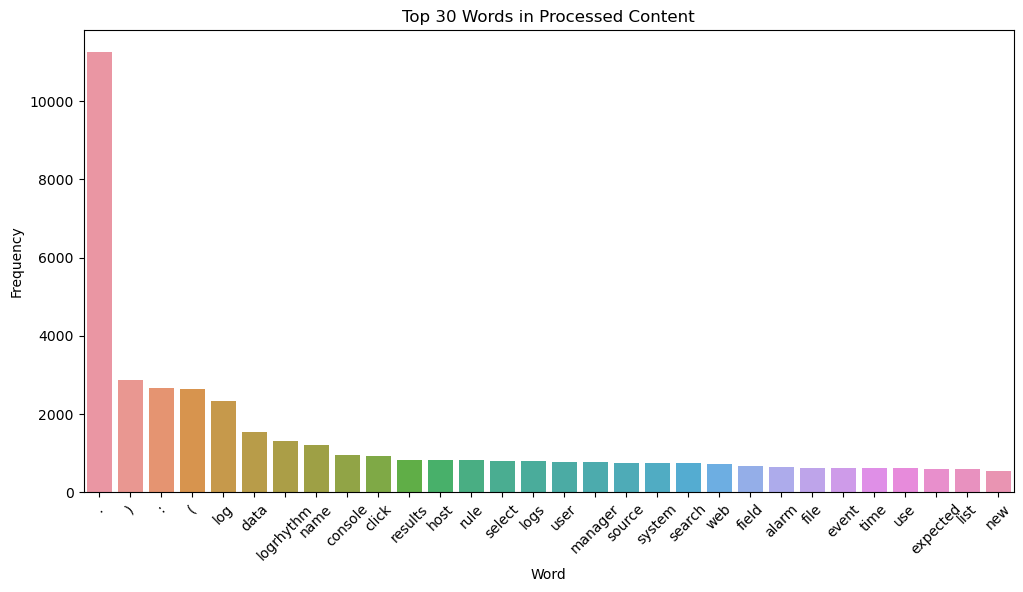

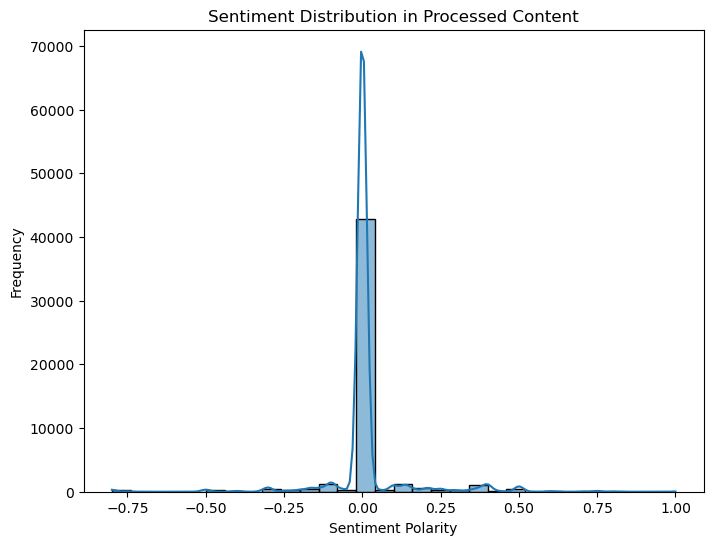

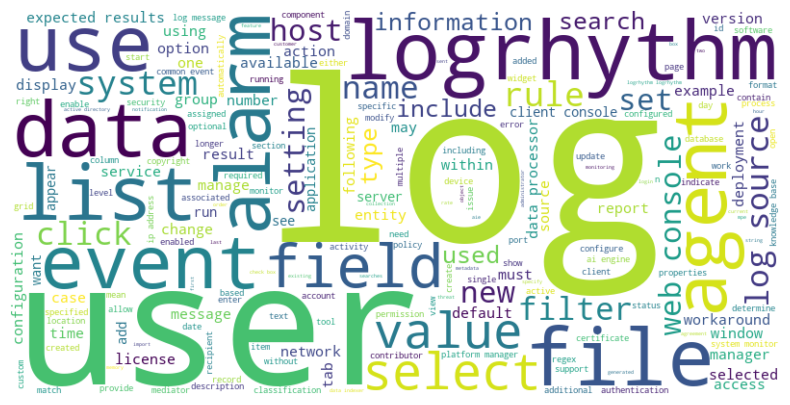

Top 10 words for Topic #0
['case', 'date', 'api', 'monitor', 'processor', 'used', 'time', 'select', 'click', 'data']


Top 10 words for Topic #1
['entity', 'number', 'type', 'agent', 'logs', 'file', 'source', 'log', 'workaround', 'rule']


Top 10 words for Topic #2
['10', 'users', 'logs', 'files', 'include', 'sources', 'message', 'data', 'event', 'log']


Top 10 words for Topic #3
['ip', 'address', 'impacted', 'expected', 'list', 'web', 'results', 'host', 'user', 'console']


Top 10 words for Topic #4
['license', 'set', 'settings', 'access', 'report', 'engine', 'eng', 'alarm', 'manager', 'logrhythm']


0      [(logrhythm siem, PERSON)]
1                              []
2      [(logrhythm siem, PERSON)]
3                   [(siem, ORG)]
4    [(logrhythm community, ORG)]
Name: named_entities, dtype: object


In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy

# Load the DataFrame from the Pickle file
df = pd.read_pickle('C:\\Users\\ted59\\Knapp069-Practicum-1-Project\\Processed Data\\processed_document_data.pkl')

# Initial Data Exploration
print("\nFirst few rows of the dataset:")
print(df.head())
print("\n")
print("\nLast few rows of the dataset:")
print(df.tail())
print("\n")
print("Description of the dataset:")
print(df.info())
print("\n")
print("Descriptive Statistics:")
print(df.describe())
print("\n")

# Text Length Analysis
df['text_length'] = df['Trigram'].apply(len)
plt.figure(figsize=(10, 6))
plt.title('Processed Text Length Distribution')
sns.histplot(df['text_length'], bins=50, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Word Frequency Analysis
def plot_word_frequencies(freq_dist, title, num_words=30):
    words, counts = zip(*freq_dist.most_common(num_words))
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts))
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Generating frequency distribution of words in processed content
all_text_processed = ' '.join(df['Trigram'])
freq_dist_processed = FreqDist(nltk.word_tokenize(all_text_processed))
plot_word_frequencies(freq_dist_processed, 'Top 30 Words in Processed Content')

# Sentiment Analysis
df['sentiment'] = df['Trigram'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution in Processed Content')
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text_processed)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Trigram'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

# Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_lg")
def ner(text):
    doc = nlp(text)
    return [(X.text, X.label_) for X in doc.ents]

# Apply NER to the processed content
df['named_entities'] = df['Trigram'].apply(ner)

# Display the first few rows to check NER results
print(df['named_entities'].head())
